# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [176]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# Create two new dataframes
north_df = pd.read_csv(r"C:\Users\kisor\Launchcode\GitHub\call-center-cleanup-assignment\NorthCallCenter.csv")
south_df = pd.read_csv(r"C:\Users\kisor\Launchcode\GitHub\call-center-cleanup-assignment\SouthCallCenter.csv")
north_df
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  
Answer : There are 9 reps in the north branch.


In [177]:
#Code Used:
north_reps = north_df["Rep ID"].nunique()
north_reps

9

#### EDA Question 1B:  How many reps are in the South branch?  
Answer: There are 11 reps in the south branch.


In [178]:
#Code Used:
south_reps = south_df["Rep ID"].nunique()
south_reps

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 
Answer:
North branch's average:
 Busy minutes - 9.98,
 Not ready minutes - 1.91,
 Incoming wait time - 3.05,
 During call wait time - 2.96


In [179]:
#Code Used:
north_df.describe()

# North branch's average:
#  Busy minutes - 9.98,
#  Not ready minutes - 1.91,
#  Incoming wait time - 3.05,
#  During call wait time - 2.96

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [180]:
#Code Used:
south_df.describe()
# South Branch's averages:
# Busy Minutes = 10.05 
# Not Ready Minutes = 9.91
# Incoming Wait Time = 3.00
# During Call Wait Time = 3.07

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [181]:
# Code Used:
# north_calls = north_df[["Time Block","Calls"]].groupby("Time Block").count()
# north_calls
# south_calls = south_df[["Time Block","Calls"]].groupby("Time Block").count()
# south_calls
# total_calls = north_calls + south_calls
# total_calls
company_calls = pd.concat([north_df,south_df])[["Time Block","Calls"]].groupby("Time Block").count()
company_calls

,Calls
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.98
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time =2.96 
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 
> - Not Ready Minutes = 9.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.07
- 3) Total Calls taken for all branches per time block:(It's the sum of both north and south calls)
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: In the 'Incoming Wait time' , Outgoing call has the missing values because incoming wait time is the amount of time where the assigned rep is available to take customer's call.
 Whereas outgoing call is the opposite, the rep calling and waiting for the customers to pick up.So the Null value has a value on the 'Incoming Wait Time'.
 It is better not to drop or replace any missing values which may or may not affect the futher calculations.

In [182]:
north_df.isna().sum()
# There are missing values in "Incoming Wait Time"

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [183]:
north_df[["Incoming or Outgoing", "Incoming Wait Time"]].groupby("Incoming or Outgoing").mean()

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.04878
Outgoing,NaN


In [184]:
# # Here I replaced missing values with 0
# north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].fillna('.')
# # north_df = north_df.dropna()
# # north_df.value_counts("Incoming Wait Time")
# north_df.value_counts("Incoming Wait Time",dropna = False) #dropna = False - includes the NaN values

In [185]:
# north_df = north_df.dropna()
# north_df.value_counts("Incoming Wait Time",dropna = False)

In [186]:
# north_df.isna().sum()

In [187]:
south_df.isna().sum()
# There are 188 missing values in the south branch

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [188]:
south_df[["Incoming or Outgoing", "Incoming Wait Time"]].groupby("Incoming or Outgoing").mean()

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.0
Outgoing,NaN


In [189]:
# south_df["Incoming Wait Time"] = south_df["Incoming Wait Time"].fillna('.')
# # south_df = south_df.dropna()
# south_df.value_counts("Incoming Wait Time",dropna = False)

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: There is two separate 'YES' values in "Sale" column. This has occured due to white space after the word 'YES  '.
So, I replaced both the "YES" with "Yes" for clarity and uniformity.

In [190]:
#Code Used
# Add Additional Cells as needed.
north_df["Sale"].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [191]:
north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [192]:
north_df = north_df.replace({"Sale": {'YES': "Yes", 'YES ': 'Yes', 'NO': 'No'}})
north_df.value_counts('Sale', dropna = False)

Sale
No     234
Yes     11
dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates in both north and south branches.

In [193]:
north_df.shape

(245, 15)

In [194]:
#North branch duplicates
duplicates_north_df = north_df.duplicated().sum()
duplicates_north_df
duplicates_north_df = north_df[north_df.duplicated()].sum()
duplicates_north_df

Unnamed: 0               0.0
Branch                   0.0
Call Purpose             0.0
Time Block               0.0
Incoming or Outgoing     0.0
Queue                    0.0
Rep ID                   0.0
Sale                     0.0
Lost Call                0.0
Abandoned                0.0
Busy Minutes             0.0
Not Ready Minutes        0.0
Incoming Wait Time       0.0
During Call Wait Time    0.0
Calls                    0.0
dtype: float64

In [195]:
south_df.shape

(314, 15)

In [196]:
duplicates_south_df = south_df.duplicated().sum()
duplicates_south_df
duplicates_south_df = south_df[south_df.duplicated()].sum()
duplicates_south_df

# duplicates_south_df.shape

Unnamed: 0               0.0
Branch                   0.0
Call Purpose             0.0
Time Block               0.0
Incoming or Outgoing     0.0
Queue                    0.0
Rep ID                   0.0
Sale                     0.0
Lost Call                0.0
Abandoned                0.0
Busy Minutes             0.0
Not Ready Minutes        0.0
Incoming Wait Time       0.0
During Call Wait Time    0.0
Calls                    0.0
dtype: float64

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: So far "Unnamed" column is the unnecessary and is dropped from both north and south branches. Other columns has some values. The assumption can be made only at the end.

In [197]:
new_north_df = north_df.drop(['Unnamed: 0','Lost Call'], axis = 1)
new_north_df


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,No,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,No,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,No,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,No,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,No,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,No,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,No,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,No,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,No,0,11,2,NaN,2,1


In [198]:
new_south_df = south_df.drop(['Unnamed: 0','Lost Call'], axis = 1)
new_south_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [199]:
# Create dataframe for the entire company named df
df = pd.concat([new_north_df,new_south_df])
df


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,No,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,No,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,No,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,No,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,No,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent had most calls (37) 
- South Branch = Eric had most calls (35)


In [200]:
rep_calls = df.groupby(['Rep ID','Branch']).sum().sort_values(by = ['Branch','Calls'],ascending = False)
rep_calls


,,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,
Eric,South,0,361,54,47.0,112,35
Randy,South,1,320,66,47.0,98,33
Sandy,South,0,325,60,34.0,100,32
Helga,South,2,292,58,36.0,95,31
George,South,0,298,53,41.0,87,29
Kate,South,0,291,61,37.0,83,29
Karl,South,0,287,61,26.0,85,28
Josh,South,0,260,50,31.0,83,26
Susan,South,0,267,53,35.0,88,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.96%
- Do any of these fall out of the optimal range of 2-5%? 
Yes, the south branch is 1.27% range.

In [201]:
# North branch abandoned calls
new_north_df["Abandoned"].agg('mean')*100

2.857142857142857

In [202]:
# South branch abandoned calls
new_south_df["Abandoned"].agg('mean')*100

1.2738853503184715

In [203]:
# Company wide abandoned calls
df["Abandoned"].agg('mean')*100

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.46%
- South Branch = 15.28%
- Company Wide = 14.49%

In [204]:
# north_pct= (north_df['Incoming Wait Time']<=2.0).agg('mean')*100 #average calls answered within 2 seconds
# north_pct

In [205]:
# south_pct = (south_df['Incoming Wait Time']<= 2.0).agg('mean')*100
# south_pct

In [206]:
# company_pct = (df['Incoming Wait Time']<= 2.0).agg('mean')*100
# company_pct

In [207]:
total_north_incoming =north_df[north_df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum() #82
total_north_incoming
total_north_incoming_wait = north_df[north_df['Incoming Wait Time']<= 2.0]['Calls'].sum() #33
total_north_incoming_wait
north_pct = (total_north_incoming_wait/total_north_incoming)*100
north_pct
# Percentage of calls answered within 2 seconds in north branch is 40.24%

40.243902439024396

In [208]:
total_south_incoming =south_df[south_df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum() #82
total_south_incoming
total_south_incoming_wait = south_df[south_df['Incoming Wait Time']<= 2.0]['Calls'].sum() #33
total_south_incoming_wait
south_pct = (total_south_incoming_wait/total_south_incoming)*100
south_pct
# Percentage of calls answered within 2 seconds in south branch is 38.1%

38.095238095238095

In [209]:
total_company_incoming =df[df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum() #82
total_company_incoming
total_company_incoming_wait = df[df['Incoming Wait Time']<= 2.0]['Calls'].sum() #33
total_company_incoming_wait
company_pct = (total_company_incoming_wait/total_company_incoming)*100
company_pct
# Percentage of calls answered within 2 seconds in company is 39%

38.94230769230769

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04 sec
- South Branch in seconds = 3.0 sec
- Company Wide in seconds = 3.02 sec


In [210]:
n_average_speed = north_df['Incoming Wait Time'].mean()
n_average_speed


3.048780487804878

In [211]:
s_average_speed = south_df['Incoming Wait Time'].mean()
s_average_speed

3.0

In [212]:
comp_ave_speed = df['Incoming Wait Time'].mean()
comp_ave_speed

3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose bar chart. It clearly shows the abandonment rate per queue.

In [213]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 


queue_dict


,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,
A,4,946,181,116.0,272,96
B,3,1501,288,134.0,455,149
C,1,1409,251,160.0,435,138
D,3,1748,349,218.0,531,176


In [214]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

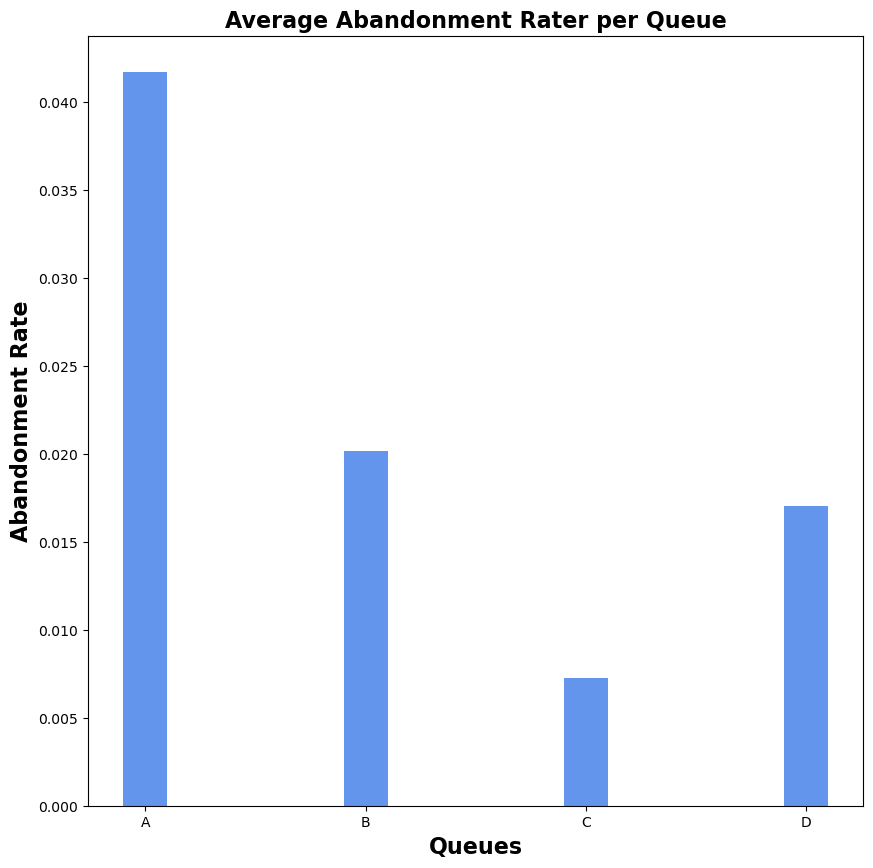

In [215]:
x=abandonment_rates.keys()
y=abandonment_rates.values()

plt.figure(figsize=(10, 10))
plt.bar(x, y,width=0.2, color='cornflowerblue')

plt.xlabel('Queues', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Abandonment Rate', color = 'black', fontsize = 16, fontweight = 'bold')
plt.title('Average Abandonment Rater per Queue', color = 'black', fontsize = 16, fontweight = 'bold')
plt.savefig('abandonedbar_north.png')
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used Scatter plot chart because we can precisely observe the relationship between 'Incoming Wait Time' and 'Service Level', where the dots represents the individual data points which are the 'Reps' of North branch. 

In [216]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
# average speed of answer is 'Incoming Wait Time' < 2 seconds

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100



In [217]:
final_table = pd.merge(north_plt,service_level,on="Rep ID")
final_table = final_table.drop(['Calls_x','Calls_y'],axis = 1)
final_table

,Rep ID,Incoming Wait Time,Service Level %
0,Amanda,2.400000,60.000000
1,Andy,3.600000,30.000000
2,Brent,2.125000,75.000000
3,Cam,2.909091,45.454545
4,Duke,2.785714,42.857143
5,Joe,3.600000,20.000000
6,Lilly,3.083333,33.333333
7,Todd,3.500000,33.333333
8,Xander,3.333333,33.333333


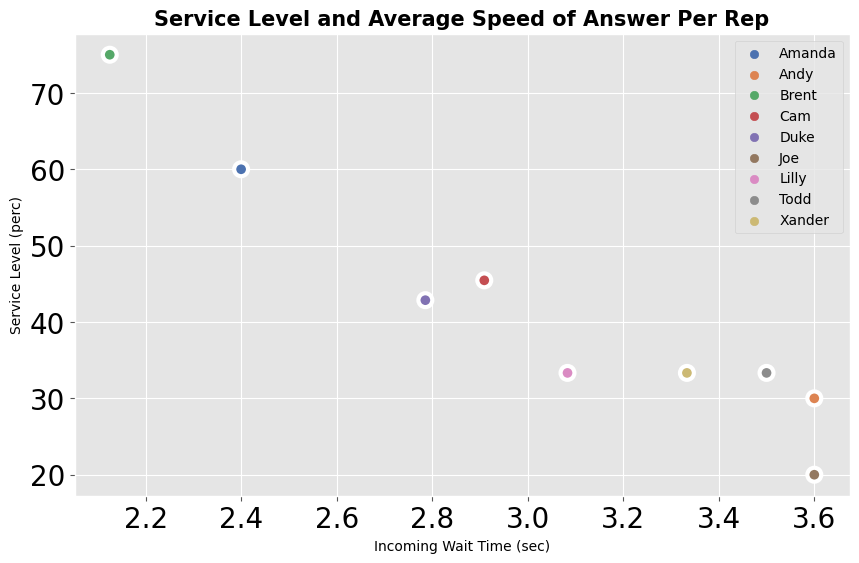

In [218]:
style.use('ggplot')
plt.figure(figsize=(10, 6))
sb.scatterplot(data = final_table, x = 'Incoming Wait Time', y = 'Service Level %', s = 100, hue = 'Rep ID', linewidth = 3, palette = 'deep')
plt.title('Service Level and Average Speed of Answer Per Rep', color = 'black', fontsize = 15, fontweight = 'bold')
plt.xlabel('Incoming Wait Time (sec)', color = 'black', fontsize = 10)
plt.ylabel('Service Level (perc)', color = 'black', fontsize = 10)
plt.legend(fontsize = 10)
plt.xticks(color = 'black', fontsize = 20)
plt.yticks(color = 'black', fontsize = 20)
plt.savefig('scatter_north.png')

plt.show()


In [219]:
south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
final_table = pd.merge(south_plt,service_level,on="Rep ID")
final_table = final_table.drop(['Calls_x','Calls_y'],axis = 1)
final_table

,Rep ID,Incoming Wait Time,Service Level %
0,Alice,2.500000,50.000000
1,Eric,2.611111,55.555556
2,George,3.153846,30.769231
3,Helga,3.272727,27.272727
4,Josh,3.444444,22.222222
5,Karl,2.888889,33.333333
6,Kate,3.363636,27.272727
7,Randy,2.937500,43.750000
8,Sandy,2.615385,53.846154
9,Sharon,3.625000,12.500000


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I have choosen the grouped bar chart to get a clear glimpse of how many incoming and outgoing call are made for purposes like complaints,sales support and product support.We clearly understand complaints are only incoming.

In [220]:
# # Create visualization 3 here:
# # The three dictionaries, complaints, sales_support, and product_support, have the information you need

# purpose_group = df.groupby("Call Purpose")
# call_purpose = ["Complaint", "Product Support", "Sales Support"]
# purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()

# #Your Code Here:
# # COMPLAINT
# keys = list(complaints.keys())
# values = list(complaints.values())
# plt.bar(keys, values, color ='crimson',
#         width = 0.4)
# plt.ylabel("Number of calls")
# plt.title("Incoming and Outgoing calls")
# plt.show()

# # SALES SUPPORT
# keys = list(sales_support.keys())
# values = list(sales_support.values())
# plt.bar(keys, values, color =['crimson','seagreen'],
#         width = 0.4)
# plt.ylabel("Number of calls")
# plt.title("Incoming and Outgoing calls")
# plt.show()

# # PRODUCT SUPPORT
# keys = list(product_support.keys())
# values = list(product_support.values())
# plt.bar(keys,values, color =['crimson','seagreen'],
#     width = 0.4)
# plt.ylabel("Number of calls")
# plt.title("Incoming and Outgoing calls")
# plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64
{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}
{'Complaints': [51, 0], 'Sales Support': [75, 123], 'Product Support': [82, 228]}


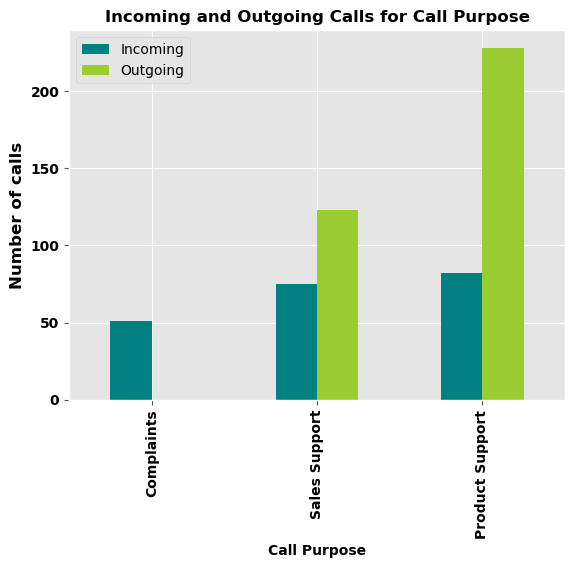

In [221]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
print(complaints)
sales_support = purpose_counts["Sales Support"].to_dict()
print(sales_support)
product_support = purpose_counts["Product Support"].to_dict()
print(product_support)
call_support={
    "Complaints": [51, 0],
    "Sales Support": [75, 123],
    "Product Support": [82, 228]
}
print(call_support)
style.use('ggplot')
d=pd.DataFrame(call_support).T
d.plot(kind='bar', color=['teal', 'yellowgreen'])
plt.xlabel('Call Purpose', color = 'black', fontsize = 10, fontweight = 'bold')
plt.ylabel('Number of calls', color = 'black', fontsize = 12, fontweight = 'bold')
plt.title('Incoming and Outgoing Calls for Call Purpose', color = 'black', fontsize = 12, fontweight = 'bold')
plt.legend(['Incoming', 'Outgoing'], loc = 'upper left', prop={'size': 10}, fontsize = 10)
plt.xticks(color = 'black',fontsize=10, fontweight='bold')
plt.yticks(color = 'black',fontsize=10, fontweight='bold')
plt.savefig('Complaintsandsupport grouped bar.png')
plt.show()

#Chose the grouped bar chart to clearly note how many incoming and outgoing call are made for purposes like complaints,sales support and product support.
# Can clearly see complaints are only incoming.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The south branch is more efficient than north branch because:     
                 (1) South branch answering speed is 3 seconds, North branch is 3.05 seconds.      
                 (2) South branch abandonment percentage is 1.27%, North branch is 2.86%.  
                 (3) South branch service level is 60%, North branch is 55%.        
                 (4) South branch employees are 11, North branch employees are 9.        
 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The North branch would benefit with extra help. They have less employees than the South branch.
 Less employees are operating as efficiently as the South branch based on service level.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: The information I wish I would have had in this analysis is 'customer rating/review'.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [222]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: